In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('./creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

## Normalizing Amount column

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
x_train = sc.fit_transform(x_train)

In [9]:
x_test = sc.transform(x_test)

In [11]:
x_train.shape, x_test.shape

((213605, 30), (71202, 30))

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_prediction = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [19]:
confusion_matrix(y_test,y_prediction)

array([[71071,    11],
       [   41,    79]], dtype=int64)

In [20]:
print(f"Accuracy of model: {accuracy_score(y_test,y_prediction)*100}%")

Accuracy of model: 99.92696834358586


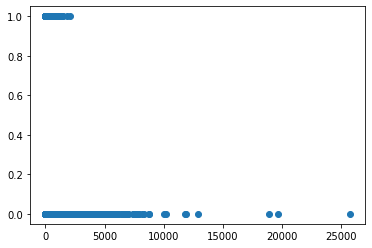

In [22]:
plt.scatter(df['Amount'],df['Class'])

## Support Vector Machine (SVM)

In [21]:
from sklearn.svm import SVC

In [26]:
classifier = SVC(kernel='rbf')

In [27]:
classifier.fit(x_train,y_train)

SVC()

In [28]:
yPred = classifier.predict(x_test)

In [29]:
confusion_matrix(y_test,yPred)

array([[71076,     6],
       [   43,    77]], dtype=int64)

In [31]:
print(f"Accuracy: {accuracy_score(y_test,yPred)*100}%")

Accuracy: 99.93118170837899%
